## Project - 영화 리뷰 데이터

### Data load

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [73]:
# labeling한 데이터 불러오기 (8점을 기준으로 1 : 긍정, 0 : 부정)
review = pd.read_csv('naver_movie_content_9000_label.csv')
review

,Unnamed: 0,movie,sentence,score,label
0,0,모비우스,믿고보는 마블스토리 ㅋ,10,1
1,1,블랙라이트,액션을 기대하고 봤다면 반대. 연기를 기대하고 봤다면 끝까지,7,0
2,2,모비우스,사전정보 없이 봤는데 러닝타임 내내 시간 가는 줄 모르게 봤습니다,10,1
3,3,모비우스,미쳤다.. 내 시간 순삭 당하고 옴,10,1
4,4,모비우스,이 영화는 한마디로 헤리포터+제다이(스타워즈)+호빗+스타트렉 4가지의 영화를 합친...,10,1
...,...,...,...,...,...
9368,9368,기묘한 가족,스토리도 좋고 두시간 내내웃은 영화는 이게처음이다 이런게 백만가야지,10,1
9369,9369,로마의 휴일,어느포인트에서 웃길지 모르는 감독과 어느포인트에서 웃어야 할지 모르는 관객과의 팽팽...,2,0
9370,9370,위크엔드 어웨이,시간 순삭이네요 재밌게 봤어요,10,1
9371,9371,크루엘라,후반부가 살짝 느슨한 느낌이었지만 재밌음! 엔딩이 뭔가 싶었는데 2가 나온다고 함.,9,1


In [5]:
review.isnull().sum()

Unnamed: 0    0
movie         0
sentence      0
score         0
label         0
dtype: int64

In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9373 entries, 0 to 9372
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9373 non-null   int64 
 1   movie       9373 non-null   object
 2   sentence    9373 non-null   object
 3   score       9373 non-null   int64 
 4   label       9373 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 366.3+ KB


In [7]:
review.describe()

,Unnamed: 0,score,label
count,9373.00000,9373.000000,9373.000000
mean,4686.00000,7.456097,0.619332
std,2705.89637,3.008155,0.485577
min,0.00000,1.000000,0.000000
25%,2343.00000,6.000000,0.000000
50%,4686.00000,8.000000,1.000000
75%,7029.00000,10.000000,1.000000
max,9372.00000,10.000000,1.000000


In [8]:
from ckonlpy.tag import Twitter

In [9]:
twitter = Twitter()

C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [11]:
twitter.morphs(review['sentence'][0])

['믿고', '보는', '마블', '스토리', 'ㅋ']

In [12]:
twitter.morphs(review['sentence'][1])

['액션',
 '을',
 '기대',
 '하고',
 '봤다면',
 '반대',
 '.',
 '연기',
 '를',
 '기대',
 '하고',
 '봤다면',
 '끝',
 '까지']

In [28]:
review['sentence'].values[0]

'믿고보는 마블스토리 ㅋ'

#### 영어 단어와 숫자가 나타나는 빈도(?) 확인

In [74]:
def review_re(data):
    for i in range(9372):
        p = re.compile('[a-zA-Z]+')
        m = p.search(data.values[i])
        print(m)

In [75]:
review_re(review['sentence'])

None
None
None
None
None
None
None
None
<re.Match object; span=(17, 20), match='OST'>
None
None
None
<re.Match object; span=(79, 86), match='Killing'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(20, 22), match='DC'>
None
None
<re.Match object; span=(4, 7), match='amp'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(35, 36), match='S'>
None
None
None
None
<re.Match object; span=(1, 2), match='D'>
None
None
None
None
None
None
None
None
<re.Match object; span=(14, 17), match='amp'>
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(3, 4), match='D'>
None
None
<re.Match object; span=(30, 32), match='CG'>
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(4, 6), match

None
None
None
None
None
None
None
None
None
<re.Match object; span=(31, 33), match='OO'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(26, 28), match='sf'>
None
<re.Match object; span=(4, 7), match='amp'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(1, 4), match='amp'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(22, 24), match='PC'>
None
None
None
None
None
<re.Match object; span=(0, 3), match='Ocn'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 2), match='PC'>
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(6, 10), match='IPTV'>
None
None
None
None
None
None
None
<re.Match object; span=(27, 28), match='b'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match objec

None
None
None
None
None
<re.Match object; span=(10, 13), match='BGM'>
<re.Match object; span=(0, 3), match='now'>
None
None
None
<re.Match object; span=(79, 82), match='amp'>
None
None
None
None
None
None
None
None
None
<re.Match object; span=(32, 33), match='B'>
None
None
None
None
None
None
<re.Match object; span=(0, 8), match='Dystopia'>
None
None
None
None
<re.Match object; span=(53, 55), match='SF'>
<re.Match object; span=(26, 28), match='cg'>
None
None
None
None
None
<re.Match object; span=(65, 68), match='amp'>
None
None
<re.Match object; span=(0, 2), match='DC'>
None
None
None
<re.Match object; span=(64, 65), match='l'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(24, 27), match='amp'>
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(26, 29), match='VOD'>
None
None
<re.Match object; span=(47, 50), match='OST'>
None
None
None
<re.Match object; span=(0, 1), match='B'>
None
None
None
Non

In [76]:
def review_re(data):
    for i in range(9372):
        p = re.compile('[0-9]+')
        m = p.search(data.values[i])
        print(m)

In [77]:
review_re(review['sentence'])

None
None
None
None
<re.Match object; span=(35, 36), match='4'>
None
None
<re.Match object; span=(2, 3), match='7'>
<re.Match object; span=(2, 3), match='2'>
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(90, 93), match='100'>
<re.Match object; span=(5, 6), match='2'>
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(18, 19), match='4'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(28, 29), match='2'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(3, 4), match='2'>
None
None
None
None
None
None
None
None
<re.Match object; span=(36, 37), match='2'>
<re.Match object; span=(2, 3), match='2'>
None
<re.Match object; span=(39, 40), match='1'>
None
<re.Match object; span=(0, 1), match='4'>
None
None
None
None
None
None
<re.Match object; span=(15, 16), match='2'>
None
None
None
None
<re.Match obj

<re.Match object; span=(8, 9), match='1'>
<re.Match object; span=(0, 1), match='1'>
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(56, 57), match='3'>
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(56, 58), match='19'>
None
None
None
None
None
<re.Match object; span=(0, 2), match='37'>
None
None
None
None
None
<re.Match object; span=(9, 11), match='10'>
<re.Match object; span=(14, 16), match='10'>
None
None
None
None
<re.Match object; span=(15, 16), match='1'>
None
<re.Match object; span=(23, 24), match='7'>
None
None
None
<re.Match object; span=(81, 83), match='20'>
<re.Match object; span=(0, 1), match='2'>
None
None
None
<re.Match object; span=(12, 14), match='37'>
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 1), match='8'>
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 1), match='3'>
None
None
None
<re.Match object; span=(97, 98), match='9'>
No

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(0, 2), match='22'>
<re.Match object; span=(3, 5), match='50'>
None
None
None
None
None
None
None
<re.Match object; span=(6, 7), match='0'>
None
None
None
None
None
None
None
None
<re.Match object; span=(6, 8), match='10'>
None
None
<re.Match object; span=(6, 8), match='10'>
<re.Match object; span=(21, 22), match='5'>
None
<re.Match object; span=(6, 8), match='10'>
None
<re.Match object; span=(18, 20), match='39'>
<re.Match object; span=(6, 8), match='10'>
None
<re.Match object; span=(68, 69), match='1'>
None
None
None
None
None
None
None
None
None
None
None
None
<re.Match object; span=(36, 37), match='1'>
None
None
None
None
<re.Match object; span=(102, 104), match='13'>
<re.Match object; span=(6, 8), match='10'>
None
<re.Match object; span=(6, 8), match='10'>
<re.Match object; span=(6, 8), match='10'>
None
<re.Match object; span=(6, 8), match='10'>
None
<re.Match object; s

### 데이터 전처리

### 데이터 정제

In [ ]:
# 전처리 과정
# 1. punctuation, 이모티콘, 숫자, 영어 제거
# 2. 띄어쓰기 수정
# 3. 형태소 분석
# 4. 한글자인 단어 제거
# 5. 반복문자 제거
# 6. 최소빈도 단어 제거
# 7. 단어 지정해주기

In [78]:
review

,Unnamed: 0,movie,sentence,score,label
0,0,모비우스,믿고보는 마블스토리 ㅋ,10,1
1,1,블랙라이트,액션을 기대하고 봤다면 반대. 연기를 기대하고 봤다면 끝까지,7,0
2,2,모비우스,사전정보 없이 봤는데 러닝타임 내내 시간 가는 줄 모르게 봤습니다,10,1
3,3,모비우스,미쳤다.. 내 시간 순삭 당하고 옴,10,1
4,4,모비우스,이 영화는 한마디로 헤리포터+제다이(스타워즈)+호빗+스타트렉 4가지의 영화를 합친...,10,1
...,...,...,...,...,...
9368,9368,기묘한 가족,스토리도 좋고 두시간 내내웃은 영화는 이게처음이다 이런게 백만가야지,10,1
9369,9369,로마의 휴일,어느포인트에서 웃길지 모르는 감독과 어느포인트에서 웃어야 할지 모르는 관객과의 팽팽...,2,0
9370,9370,위크엔드 어웨이,시간 순삭이네요 재밌게 봤어요,10,1
9371,9371,크루엘라,후반부가 살짝 느슨한 느낌이었지만 재밌음! 엔딩이 뭔가 싶었는데 2가 나온다고 함.,9,1


In [79]:
review['sentence'] = review['sentence'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
review.head()

C:\Users\user\AppData\Local\Temp/ipykernel_14308/2819701629.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review['sentence'] = review['sentence'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


,Unnamed: 0,movie,sentence,score,label
0,0,모비우스,믿고보는 마블스토리 ㅋ,10,1
1,1,블랙라이트,액션을 기대하고 봤다면 반대 연기를 기대하고 봤다면 끝까지,7,0
2,2,모비우스,사전정보 없이 봤는데 러닝타임 내내 시간 가는 줄 모르게 봤습니다,10,1
3,3,모비우스,미쳤다 내 시간 순삭 당하고 옴,10,1
4,4,모비우스,이 영화는 한마디로 헤리포터제다이스타워즈호빗스타트렉 가지의 영화를 합친것 보다 배...,10,1


In [80]:
review['sentence'][0]

'믿고보는 마블스토리 ㅋ'

In [81]:
review['sentence'] = review['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
review['sentence'].replace('', np.nan, inplace = True)
print(review.isnull().sum())

Unnamed: 0     0
movie          0
sentence      55
score          0
label          0
dtype: int64


C:\Users\user\AppData\Local\Temp/ipykernel_14308/3460792129.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review['sentence'] = review['sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [82]:
review = review.dropna(how = 'any')
print(len(review))

9318


### 불용어 제거

In [83]:
from konlpy.tag import Okt
okt = Okt()

In [84]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [85]:
stopwords = ['아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓']

In [86]:
review_new = []

for sentence in tqdm(review['sentence']):
    tokenized_sentence = okt.morphs(sentence, stem = True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    review_new.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 9318/9318 [00:19<00:00, 483.90it/s]


In [87]:
print(review_new[:3])

[['믿다', '보다', '마블', '스토리', 'ㅋ'], ['액션', '을', '기대하다', '보다', '반대', '연기', '를', '기대하다', '보다', '끝', '까지'], ['사전', '정보', '없이', '보다', '러닝', '타임', '내내', '시간', '가다', '줄', '모르다', '보다']]


In [88]:
review_new[0]

['믿다', '보다', '마블', '스토리', 'ㅋ']

In [ ]:
# ㅋㅋㅋㅋㅋㅋ 이런거 어떻게 없애지? -> 정규화(Normalization)

### 정수 인코딩

In [90]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_new)

In [91]:
print(tokenizer.word_index)

{'이': 1, '하다': 2, '영화': 3, '보다': 4, '의': 5, '에': 6, '가': 7, '을': 8, '도': 9, '들': 10, '를': 11, '는': 12, '좋다': 13, '있다': 14, '은': 15, '연기': 16, '이다': 17, '너무': 18, '없다': 19, '한': 20, '으로': 21, '되다': 22, '적': 23, '만': 24, '같다': 25, '배우': 26, '스토리': 27, '재밌다': 28, '과': 29, '다': 30, '것': 31, '않다': 32, '에서': 33, '로': 34, '그': 35, '아니다': 36, '생각': 37, '진짜': 38, '자다': 39, '와': 40, '나오다': 41, '인': 42, '수': 43, '더': 44, '안': 45, '사람': 46, '시간': 47, '정말': 48, '감동': 49, '연출': 50, '만들다': 51, '나': 52, '볼': 53, '하고': 54, '게': 55, '가다': 56, '최고': 57, '들다': 58, '재미있다': 59, '요': 60, '못': 61, '고': 62, '내': 63, '보고': 64, '말': 65, '그냥': 66, '까지': 67, '모르다': 68, '잘': 69, '싶다': 70, '감독': 71, '좀': 72, '때': 73, '점': 74, '왜': 75, '배트맨': 76, '그렇다': 77, '정우': 78, '님': 79, '느낌': 80, '이렇다': 81, '많다': 82, '사랑': 83, '장면': 84, '아쉽다': 85, '오다': 86, '평점': 87, '느끼다': 88, '액션': 89, '정도': 90, '내용': 91, '이야기': 92, '하나': 93, '중': 94, '다시': 95, '마지막': 96, '작품': 97, '주인공': 98, '지루하다': 99, '네': 100, '알다': 101, '많이': 102, '없이': 

In [ ]:
# 단어가 12000개가 넘게 존재함. 
# 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여됨. 
# 높은 정수(큰 숫자)가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미함. 

In [93]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 12362
등장 빈도가 1번 이하인 희귀 단어의 수: 5729
단어 집합에서 희귀 단어의 비율: 46.343633716227146
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.2721997246988535


In [ ]:
# 등장 빈도가 threshold 값인 3회 미만. 즉, 2회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지함.
# 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 5% 정도 되는데, 이를 삭제하는 것이 좋을까,, 

# 등장 빈도가 threshold 값인 2회 미만. 즉, 2회 이하인 단어들은 단어 집합에서 약 절반 못 미치게 차지함.
# 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 3% 정도 되는데, 이를 삭제하는 것이 좋겠지,, 

In [94]:
# 전체 단어 개수 중 빈도수 1 이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6634


In [95]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(review_new)
review_new = tokenizer.texts_to_sequences(review_new)

In [96]:
print(review_new[:3])

[[197, 4, 278, 27, 287], [89, 8, 215, 4, 2823, 16, 11, 215, 4, 139, 67], [2824, 1147, 103, 4, 454, 397, 226, 47, 56, 209, 68, 4]]


### 빈 샘플(empty samples) 제거

In [97]:
drop_review = [index for index, sentence in enumerate(review_new) if len(sentence) < 1]

In [98]:
# 빈 샘플들을 제거
review_new = np.delete(review_new, drop_review, axis=0)
print(len(review_new))

9315


C:\Users\user\Desktop\.ipynb_checkpoints\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [ ]:
# 9373 -> 9315로 샘플의 수가 줄어듦.

### 패딩(padding)

리뷰의 최대 길이 : 367
리뷰의 평균 길이 : 18.180568974771873


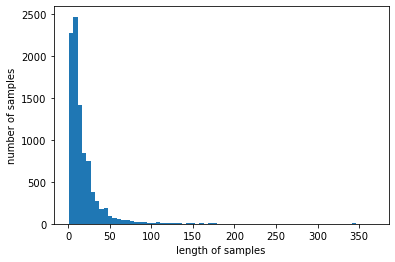

In [100]:
print('리뷰의 최대 길이 :',max(len(review) for review in review_new))
print('리뷰의 평균 길이 :',sum(map(len, review_new)) / len(review_new))
plt.hist([len(review) for review in review_new], bins = 70)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [101]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [102]:
max_len = 50
below_threshold_len(max_len, review_new)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 94.52495974235104


In [ ]:
# 전체 훈련 데이터 중 약 94%의 리뷰가 50 이하의 길이를 가지는 것을 확인함. 
# 모든 샘플의 길이를 50으로 맞춤.

In [103]:
review_new = pad_sequences(review_new, maxlen = max_len)

In [104]:
review_new

array([[  0,   0,   0, ..., 278,  27, 287],
       [  0,   0,   0, ...,   4, 139,  67],
       [  0,   0,   0, ..., 209,  68,   4],
       ...,
       [  0,   0,   0, ...,  60,  28,   4],
       [  0,   0,   0, ...,  56,  41, 119],
       [  0,   0,   0, ...,  97, 392,   2]])

### Create a Model

In [106]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout # Permute : 주어진 패턴에 따라서 입력 차수 변경
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint